<a href="https://colab.research.google.com/github/akshay-alpha/Deep-Learning/blob/main/MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#GPU enabled
import tensorflow as tf
tf.test.gpu_device_name()

tf.__version__

'2.8.0'

In [2]:
#importing all necessary libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt

#model has sequential layers one after the another
from keras.models import Sequential

#dropout to thinout layers, activation
from keras.layers import Dense, Dropout, Activation, Flatten

#layers used in model
from keras.layers import Conv2D, MaxPooling2D

#to plot models and convert numbers into categorical valus
from keras.utils import np_utils

#to import datasets
import keras
from keras.datasets import mnist

In [3]:
#load the data sets

(X_train, y_train),(X_test, y_test) = mnist.load_data()

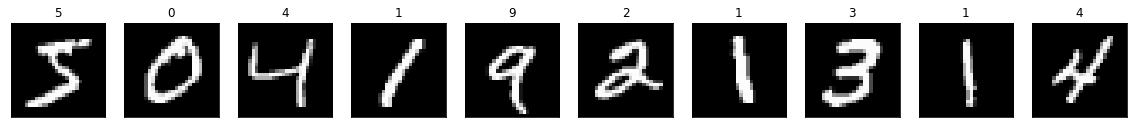

In [4]:
#visualization

fig,axes = plt.subplots(ncols=10,sharex=False,sharey=True,figsize=(20,4))

for i in range(10):

  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i],cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)

plt.show()

In [5]:
#before reshaping
X_train.shape

(60000, 28, 28)

In [6]:
#reshaping the inputs

X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [7]:
#after reshaping
X_train.shape

(60000, 28, 28, 1)

In [8]:
#basic preprocessing

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
#normalizinge the pixel values
X_train /=255
X_test /=255

In [10]:
y_train[2]

4

In [11]:
#converting numerical into categorical values

y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
from numpy.core.fromnumeric import shape
from keras import activations
#Model Building

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform',input_shape=(28,28,1)))
model.add((MaxPooling2D((2,2))))
model.add(Flatten())
model.add(Dense(100,activation='relu',kernel_initializer='he_uniform'))

#final model should be of value 10 as it is MNIST data set
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               540900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

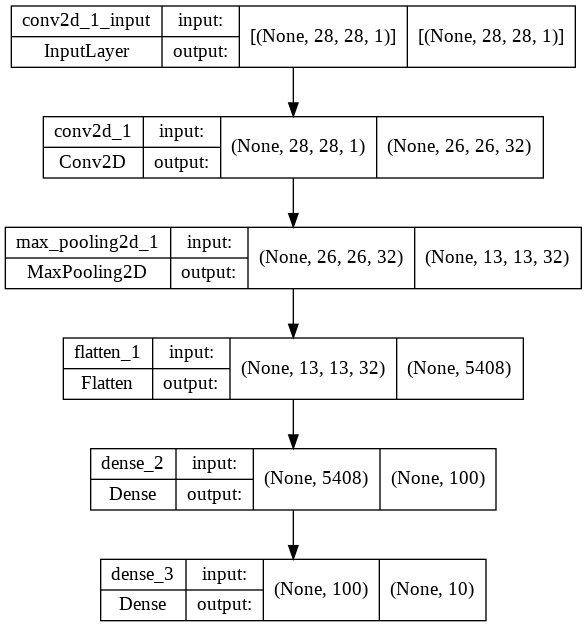

In [20]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
model.fit(X_train,y_train,batch_size=32,epochs=2,verbose=1,validation_data=(X_test,y_test))

Epoch 1/2
1875/1875 [==============================] - 19s 5ms/step - loss: 0.1379 - accuracy: 0.9579 - val_loss: 0.0804 - val_accuracy: 0.9756
Epoch 2/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0479 - accuracy: 0.9850 - val_loss: 0.0421 - val_accuracy: 0.9857


In [23]:
model.save('mnist_cnn_model.h5')

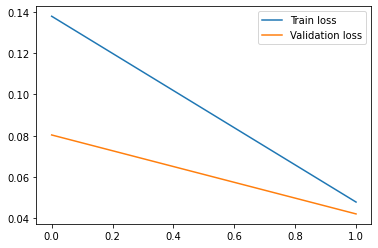

In [25]:
#loss graph
plt.plot(model.history.history['loss'],label='Train loss')
plt.plot(model.history.history['val_loss'],label='Validation loss')
plt.legend()

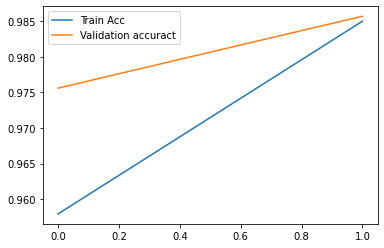

In [27]:
#Accuracy graph
plt.plot(model.history.history['accuracy'],label='Train Acc')
plt.plot(model.history.history['val_accuracy'],label='Validation accuract')
plt.legend()

In [28]:
#load the model
model = keras.models.load_model('mnist_cnn_model.h5')

In [35]:
X_test[2]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [32]:
X=np.reshape(X_test[2],(1,28,28,1))
#x = x.astype('float32')
#x/=255



In [33]:
np.argmax(model.predict(X))

1